# Simulation 1.1 - Analyzing the agents


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent as agn

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

exploration_train = 0.1
exploration_test = 0
learningrate = 0.1
discount = 0.9
max_steps = 1000

flag_reward = 10
query_reward = -1

## Loading the statistics

In [3]:
train_data = joblib.load('ignore_simul1_traindata_20210225215819702347.pkl')
test_data = joblib.load('ignore_simul1_testdata_20210225215819702347.pkl')

## Analyzing the agent

Text(0, 0.5, 'number of states')

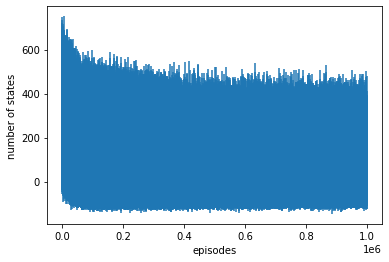

In [4]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,0,:],axis=0),yerr=np.std(train_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')

4.795 5.0


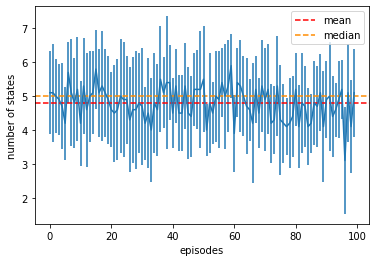

In [5]:
plt.errorbar(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0),yerr=np.std(test_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.axhline(np.median(test_data[:,0,:]),c='darkorange',ls='--',label='median')
print(np.mean(test_data[:,0,:]), np.median(test_data[:,0,:]))
plt.legend()

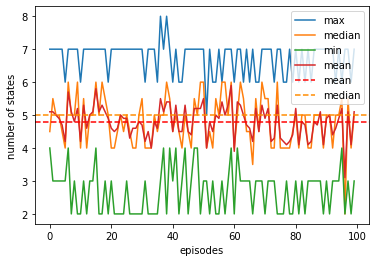

In [19]:
plt.plot(range(n_episodes_test),np.max(test_data[:,0,:],axis=0), label = "max")
plt.plot(range(n_episodes_test),np.median(test_data[:,0,:],axis=0), label = "median")
plt.plot(range(n_episodes_test),np.min(test_data[:,0,:],axis=0), label = "min")
plt.plot(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0), label = "mean")

plt.xlabel('episodes')
plt.ylabel('number of states')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.axhline(np.median(test_data[:,0,:]),c='darkorange',ls='--',label='median')
plt.legend()

In [20]:
num_steps = test_data[:,0,:].flatten()
conf = 1.96 * np.std(num_steps) / np.sqrt(len(num_steps))
mean = np.mean(num_steps)
print(mean, conf)
print(np.round([mean-conf, mean+conf],3))

4.795 0.08692716008245065
[4.708 4.882]


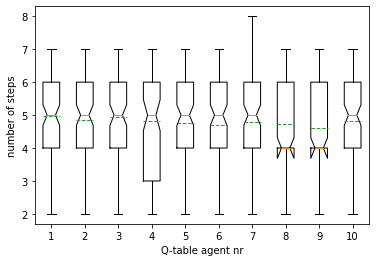

In [24]:
plt.boxplot(test_data[:,0,:].T, notch = True, showmeans = True, meanline = True)
plt.ylabel("number of steps")
plt.xlabel("Q-table agent nr")
plt.savefig("figures/sim1_1_notch1.png")

{'whiskers': [<matplotlib.lines.Line2D at 0x17a402b0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a402c16d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a402b0c70>],
 'medians': [<matplotlib.lines.Line2D at 0x17a402c1d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a402cc460>],
 'means': [<matplotlib.lines.Line2D at 0x17a402cc130>]}

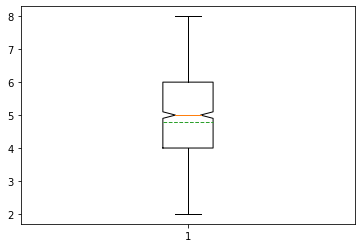

In [9]:
plt.boxplot(test_data[:,0,:].flatten(), notch = True, showmeans = True, meanline= True)

In [10]:
steps = 10 - test_data[:,1,:] + 1

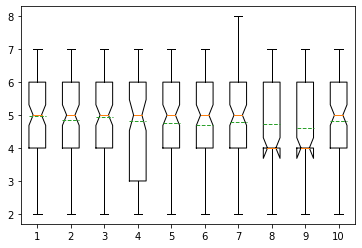

In [11]:
plt.boxplot(steps.T, notch = True, showmeans = True, meanline= True)
plt.show()

In [12]:
test2 = joblib.load('ignore_simul1_1testdata_20210301213304962153.pkl')[:,0,:]
#train_data = joblib.load('ignore_simul1_1traindata_20210301213304962153.pkl')
#test_data = joblib.load('ignore_simul1_1testdata_20210301213304962153.pkl')

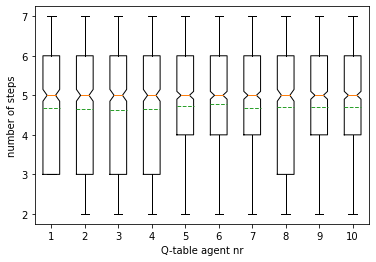

In [25]:
plt.boxplot(test2.T, notch = True, showmeans = True, meanline= True)
plt.ylabel("number of steps")
plt.xlabel("Q-table agent nr")
plt.savefig("figures/sim1_1_notch1000.png")

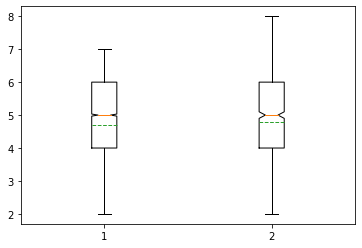

In [14]:
[test2.flatten(), steps.flatten()]
plt.boxplot([test2.flatten(), steps.flatten()], notch = True, showmeans = True, meanline= True)
plt.show()